# Assignment 1 (Logistic Regression)

## Loading the dataset

In [811]:
import numpy as np
import pandas as pd

In [812]:
df = pd.read_csv('data.csv', sep=';')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Preprocessing data

In [813]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [814]:
df.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [815]:
for col in df.columns:
    print(f'{col}: {df[col].min()} -> {df[col].max()}')

Marital status: 1 -> 6
Application mode: 1 -> 57
Application order: 0 -> 9
Course: 33 -> 9991
Daytime/evening attendance	: 0 -> 1
Previous qualification: 1 -> 43
Previous qualification (grade): 95.0 -> 190.0
Nacionality: 1 -> 109
Mother's qualification: 1 -> 44
Father's qualification: 1 -> 44
Mother's occupation: 0 -> 194
Father's occupation: 0 -> 195
Admission grade: 95.0 -> 190.0
Displaced: 0 -> 1
Educational special needs: 0 -> 1
Debtor: 0 -> 1
Tuition fees up to date: 0 -> 1
Gender: 0 -> 1
Scholarship holder: 0 -> 1
Age at enrollment: 17 -> 70
International: 0 -> 1
Curricular units 1st sem (credited): 0 -> 20
Curricular units 1st sem (enrolled): 0 -> 26
Curricular units 1st sem (evaluations): 0 -> 45
Curricular units 1st sem (approved): 0 -> 26
Curricular units 1st sem (grade): 0.0 -> 18.875
Curricular units 1st sem (without evaluations): 0 -> 12
Curricular units 2nd sem (credited): 0 -> 19
Curricular units 2nd sem (enrolled): 0 -> 23
Curricular units 2nd sem (evaluations): 0 -> 33

In [816]:
target_categories = df['Target'].unique()
target_categories

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [817]:
df['Target'] = df['Target'].apply(lambda cate: 1 if cate == target_categories[1] else 0) # 1 : Graduate, 0: Non-Gradute
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,1
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,1


## Normalization data

In [818]:
continuous_columns = [
    'Previous qualification (grade)',
    'Admission grade',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (grade)',
    'Unemployment rate',
    'Inflation rate',
    'GDP'
]

for col in continuous_columns:
    df[col] = (df[col] - df[col].mean()) / df[col].std() # standard normalization
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,-0.804750,1,19,12,...,0,0,0,0,-1.963267,0,-0.287606,0.124372,0.765674,0
1,1,15,1,9254,1,1,2.076585,1,1,3,...,0,6,6,6,0.659487,0,0.876123,-1.105097,0.347160,1
2,1,1,5,9070,1,1,-0.804750,1,37,37,...,0,6,0,0,-1.963267,0,-0.287606,0.124372,0.765674,0
3,1,17,2,9773,1,1,-0.804750,1,38,37,...,0,6,10,5,0.416403,0,-0.813161,-1.466705,-1.375356,1
4,2,39,1,8014,0,1,-2.472892,1,37,38,...,0,6,6,6,0.531548,0,0.876123,-1.105097,0.347160,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,-0.577276,1,1,1,...,0,6,8,5,0.467578,0,1.476757,1.136876,-1.789464,1
4420,1,1,2,9773,1,1,-0.956399,105,1,1,...,0,6,6,2,0.147730,0,-0.174987,-0.454201,0.889026,0
4421,1,1,1,9500,1,1,1.621637,1,37,37,...,0,8,9,1,0.627502,0,0.876123,-1.105097,0.347160,0
4422,1,1,1,9147,1,1,3.593077,1,37,37,...,0,5,6,5,0.339639,0,-0.813161,-1.466705,-1.375356,1


## Feature Engineering

In [819]:
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\nguye\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\nguye\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


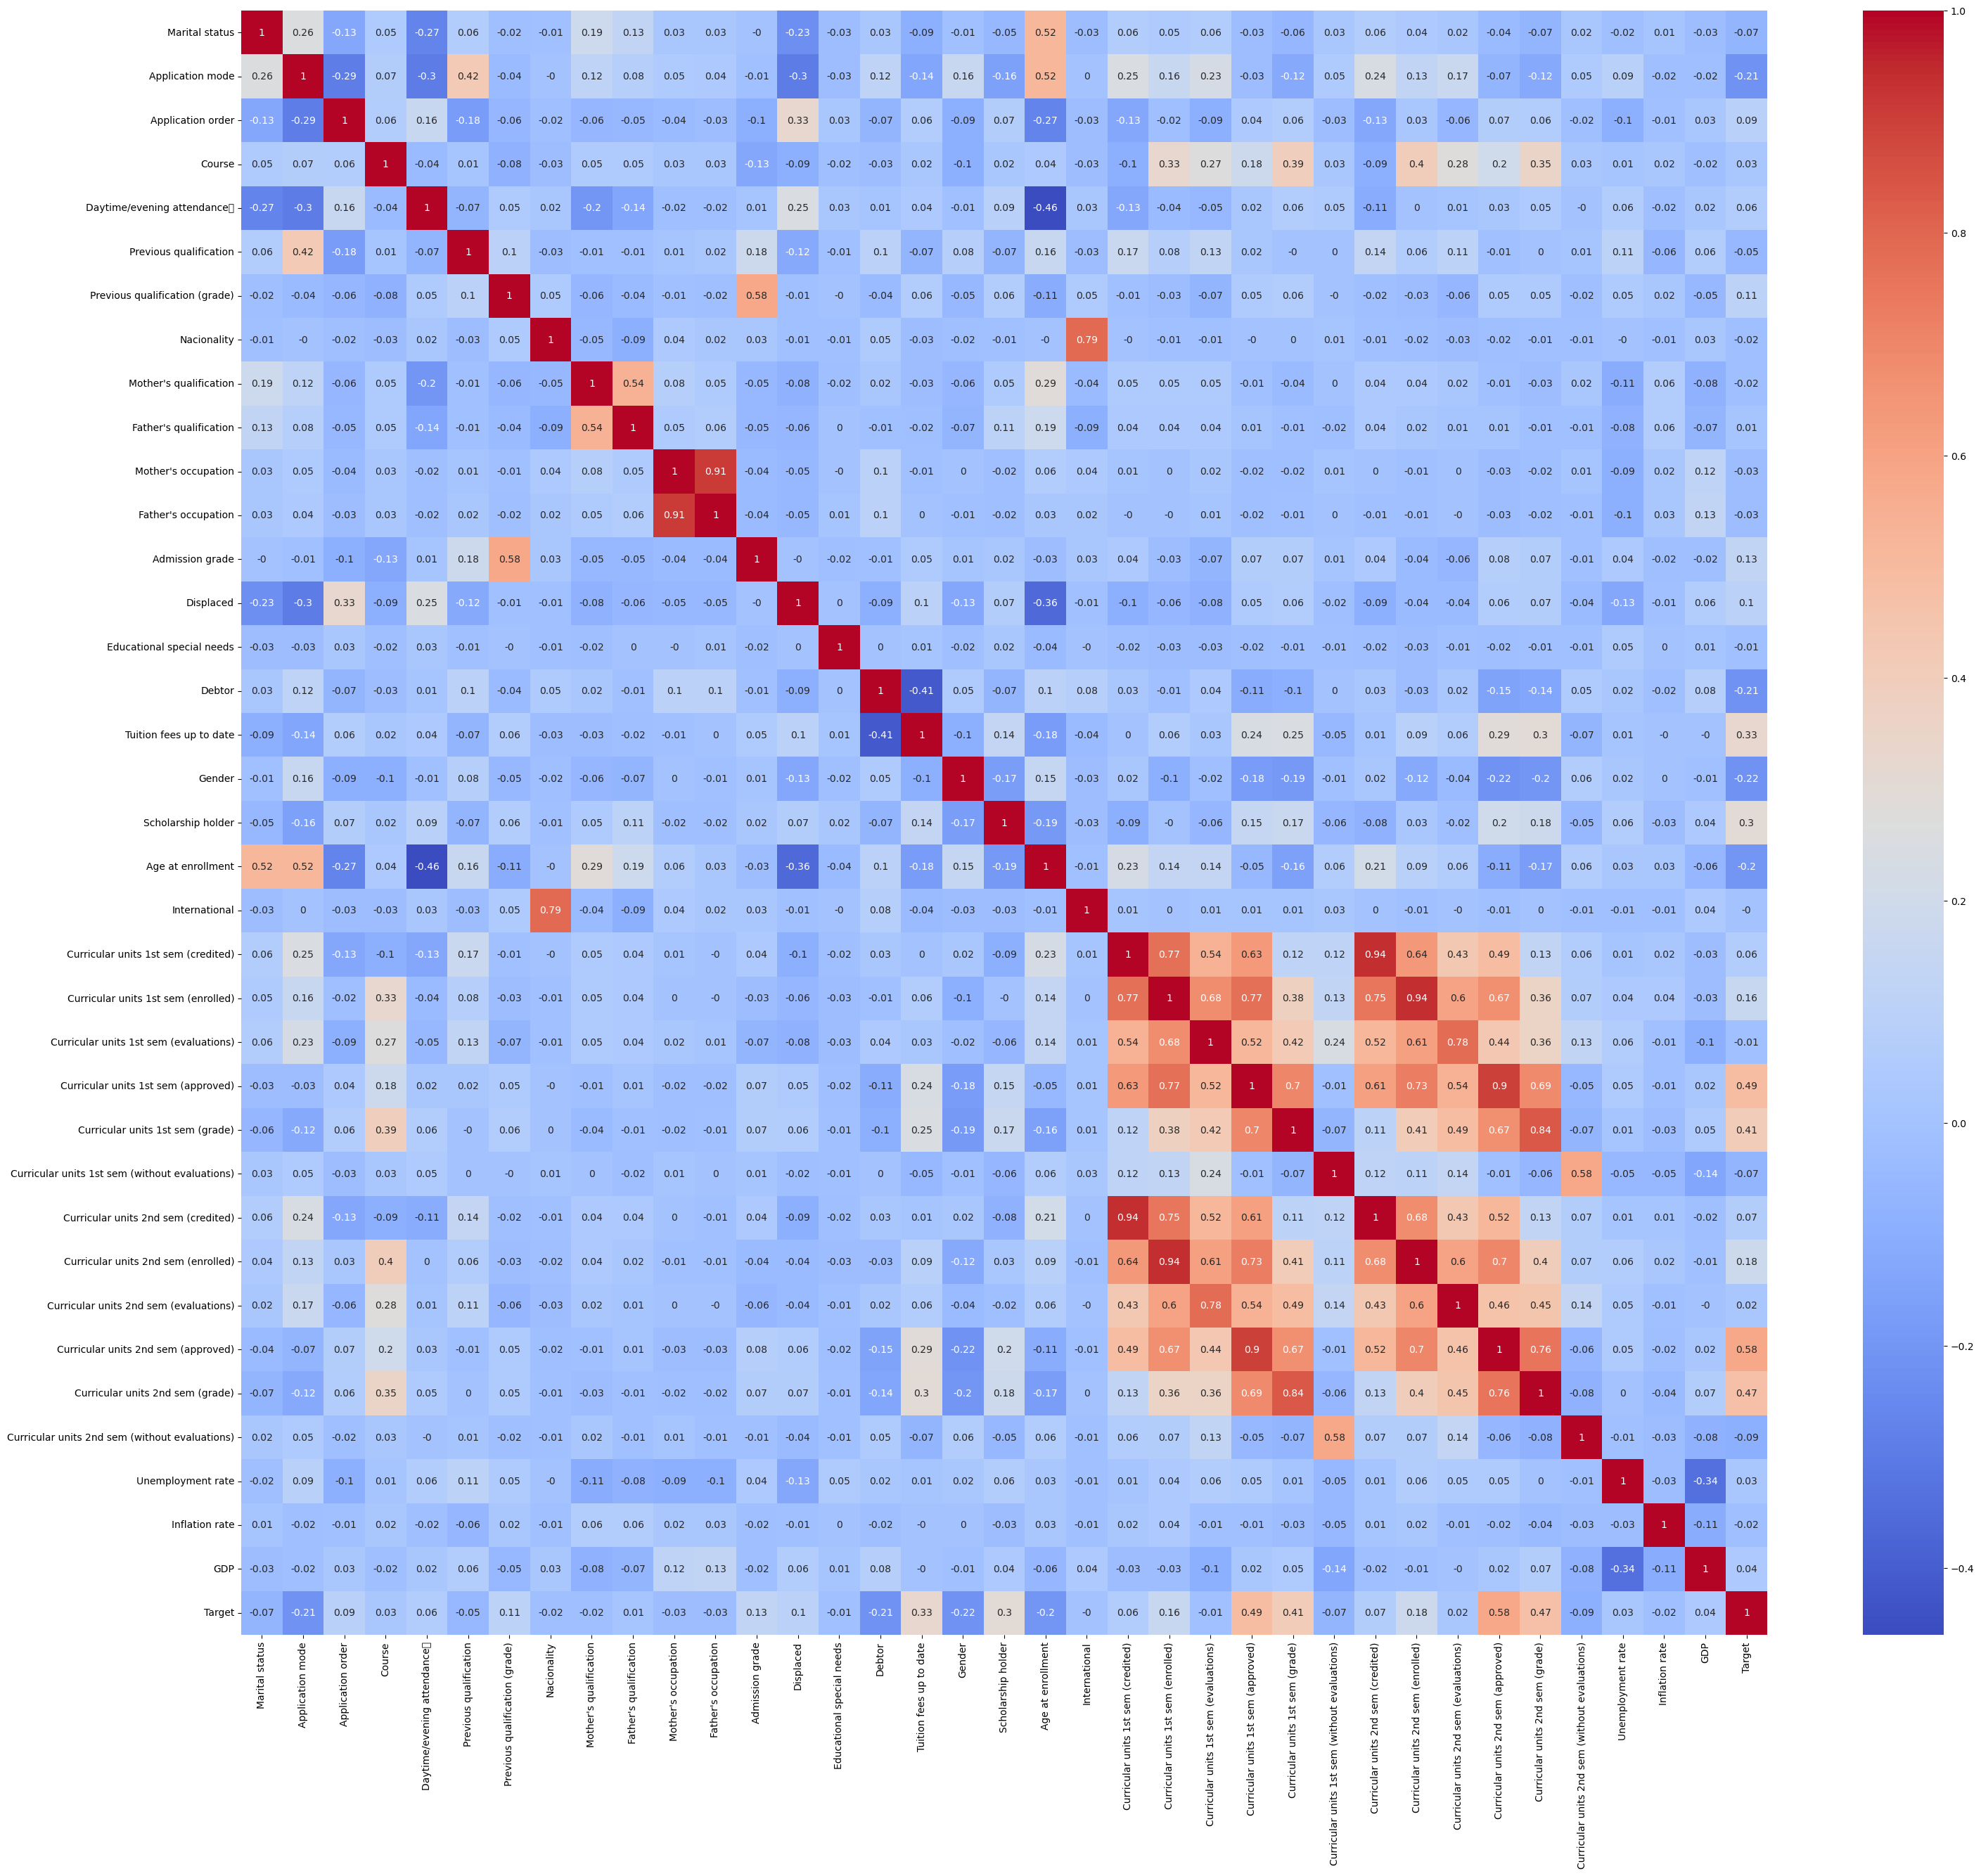

In [820]:
corr_matrix = df.corr() # correlation matrix

plt.figure(figsize=(35, 30))
sns.heatmap(corr_matrix.round(2), annot=True, cmap='coolwarm')
plt.show()

In [821]:
threshold = 0.9 # nguong loai bo
to_drop_columns = set()

for i in range(corr_matrix.shape[0] - 1):
    for j in range(i + 1, corr_matrix.shape[1] - 1):
        # Tim 2 features co do tuong quan vuot nguong threshold
        if abs(corr_matrix.iloc[i, j]) > threshold: 
            # Loai bo dac trung co do tuong quan thap hon so voi target
            if corr_matrix.iloc[i, corr_matrix.shape[1] - 1] > corr_matrix.iloc[j, corr_matrix.shape[0] - 1]: 
                to_drop_columns.add(corr_matrix.columns[j])
            else:
                to_drop_columns.add(corr_matrix.columns[j])
to_drop_columns

{'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 "Father's occupation"}

c:\Users\nguye\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\nguye\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


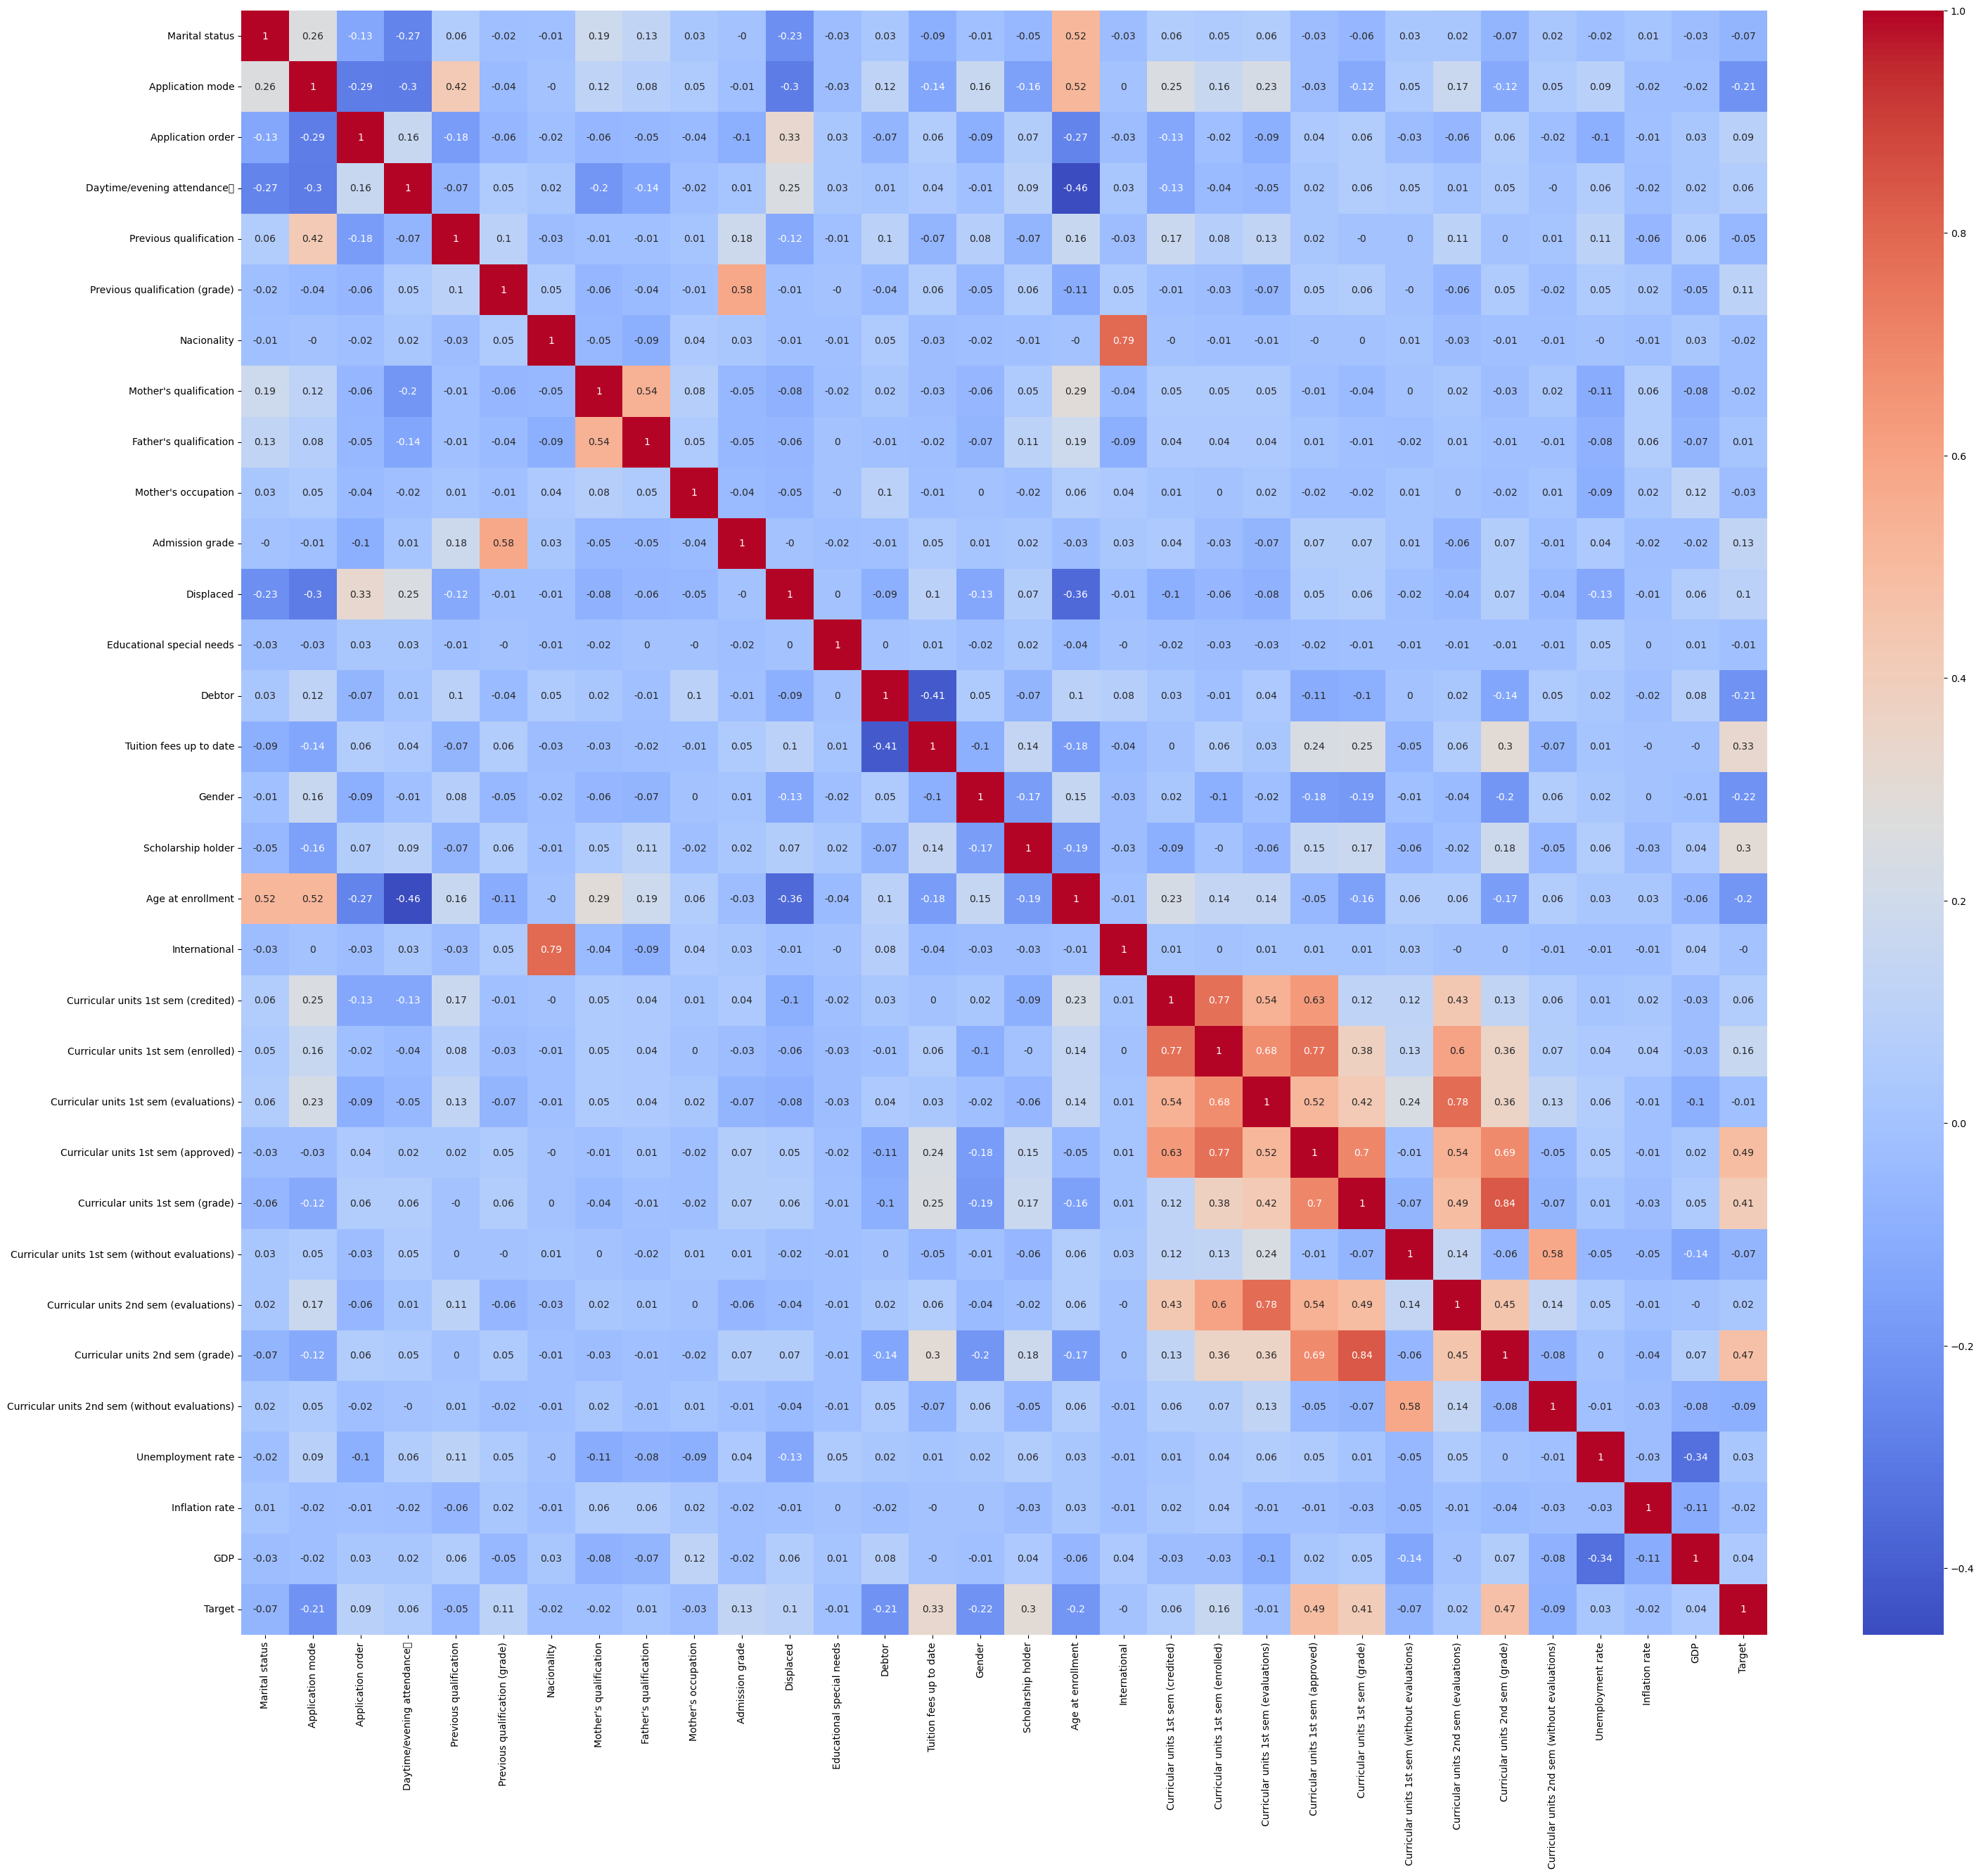

In [822]:
# Them cot 'Course' vao danh sach loai bo
to_drop_columns.add('Course')

# Loai bo nhung dac trung co do tuong quan cao
df = df.drop(columns=list(to_drop_columns))

# Truc quan hoa lai ket qua correlation matrix
plt.figure(figsize=(35, 30))
sns.heatmap(data=df.corr().round(2), annot=True, cmap='coolwarm')
plt.show()

## Constructing input and output variables

In [823]:
X = df.drop(columns=['Target']).values
X = np.c_[np.ones((X.shape[0], 1)), X]
print(X.shape)

(4424, 32)


In [824]:
y = df['Target'].values.reshape(-1, 1)
print(y.shape)

(4424, 1)


In [825]:
# Chia tap du lieu
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

## Building Logistic Regression Model

In [826]:
from tqdm import tqdm

In [827]:
class LogisticRegression:
    def __init__(self, epochs : int, lr : float) -> None:
        self.epochs = epochs
        self.lr = lr
        self.theta = None
        self.losses = []
        
    def sigmoid(self, z: np.ndarray) -> np.ndarray:
        return 1 / (1 + np.exp(-z))
    
    def loss_fnc(self, y: np.ndarray, y_pred: np.ndarray) -> float:
        return - (y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)).mean()
    
    def accuracy(self, y: np.ndarray, y_pred: np.ndarray) -> float:
        return (1 - np.abs(y - y_pred)).mean()
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        z = X @ self.theta
        y_pred = self.sigmoid(z)
        return y_pred
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        n_samples = X.shape[0]
        dim = X.shape[1]
        self.theta = np.zeros((dim, 1))
        
        with tqdm(range(self.epochs)) as pb:
            for epoch in pb:
                
                # forward
                pb.set_description(f'Epoch {epoch + 1}')
                y_pred = self.predict(X)
                
                # backward
                gradient = 1/n_samples * (X.T @ (y_pred - y))
                self.theta -= self.lr * gradient
                
                # update losses
                loss = self.loss_fnc(y, y_pred)
                pb.set_postfix({'Loss' : loss})
                self.losses.append(loss)

## Training and Evaluating

In [828]:
log = LogisticRegression(2000, 0.01)
log.fit(X_train, y_train)

Epoch 2000: 100%|██████████| 2000/2000 [00:03<00:00, 523.86it/s, Loss=0.597]


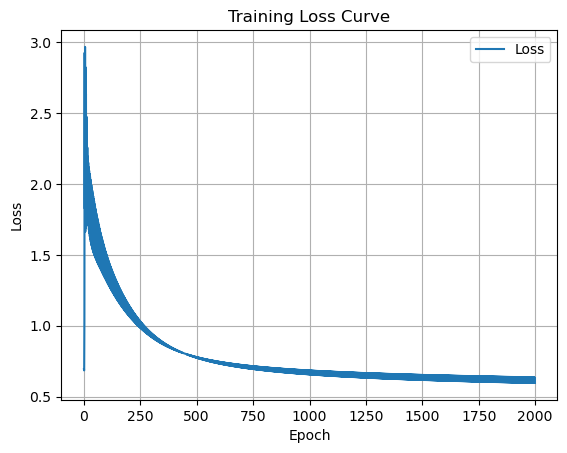

In [829]:
plt.plot(log.losses, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.grid()
plt.show()

In [830]:
y_pred = log.predict(X_test)
score = log.accuracy(y_test, y_pred)
print(f'Accuracy: {score}')

Accuracy: 0.743502467922199


# Assignment 2 (Softmax Regression)

## Loading the dataset

In [831]:
df = pd.read_csv('data.csv', sep=';')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Preprocessing data

In [832]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [833]:
df.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [834]:
for col in df.columns:
    print(f'{col}: {df[col].min()} -> {df[col].max()}')

Marital status: 1 -> 6
Application mode: 1 -> 57
Application order: 0 -> 9
Course: 33 -> 9991
Daytime/evening attendance	: 0 -> 1
Previous qualification: 1 -> 43
Previous qualification (grade): 95.0 -> 190.0
Nacionality: 1 -> 109
Mother's qualification: 1 -> 44
Father's qualification: 1 -> 44
Mother's occupation: 0 -> 194
Father's occupation: 0 -> 195
Admission grade: 95.0 -> 190.0
Displaced: 0 -> 1
Educational special needs: 0 -> 1
Debtor: 0 -> 1
Tuition fees up to date: 0 -> 1
Gender: 0 -> 1
Scholarship holder: 0 -> 1
Age at enrollment: 17 -> 70
International: 0 -> 1
Curricular units 1st sem (credited): 0 -> 20
Curricular units 1st sem (enrolled): 0 -> 26
Curricular units 1st sem (evaluations): 0 -> 45
Curricular units 1st sem (approved): 0 -> 26
Curricular units 1st sem (grade): 0.0 -> 18.875
Curricular units 1st sem (without evaluations): 0 -> 12
Curricular units 2nd sem (credited): 0 -> 19
Curricular units 2nd sem (enrolled): 0 -> 23
Curricular units 2nd sem (evaluations): 0 -> 33

In [835]:
target_categories = df['Target'].unique()
target_categories

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [836]:
def target_encode(cate):
    target_dict = {
        'Dropout' : 0,
        'Graduate' : 1,
        'Enrolled' : 2
    }
    return target_dict[cate]

In [837]:
df['Target'] = df['Target'].apply(target_encode)

df['Target'].value_counts()
# sns.countplot(x=df['Target'])

Target
1    2209
0    1421
2     794
Name: count, dtype: int64

## Normalization data

In [838]:
df_scaled = df.drop(columns=['Target'])
df_scaled = (df_scaled - df_scaled.mean()) / df_scaled.std()
df = pd.concat([df_scaled, df['Target']], axis=1)
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,-0.294795,-0.095459,2.490614,-4.209044,0.350043,-0.350191,-0.804750,-0.126284,-0.036014,-0.669702,...,-0.28241,-2.838016,-2.042399,-1.471361,-1.963267,-0.199418,-0.287606,0.124372,0.765674,0
1,-0.294795,-0.209845,-0.554005,0.192559,0.350043,-0.350191,2.076585,-0.126284,-1.189625,-1.256285,...,-0.28241,-0.105714,-0.522623,0.518845,0.659487,-0.199418,0.876123,-1.105097,0.347160,1
2,-0.294795,-1.010546,2.490614,0.103393,0.350043,-0.350191,-0.804750,-0.126284,1.117596,0.959694,...,-0.28241,-0.105714,-2.042399,-1.471361,-1.963267,-0.199418,-0.287606,0.124372,0.765674,0
3,-0.294795,-0.095459,0.207150,0.444065,0.350043,-0.350191,-0.804750,-0.126284,1.181686,0.959694,...,-0.28241,-0.105714,0.490561,0.187144,0.416403,-0.199418,-0.813161,-1.466705,-1.375356,1
4,1.356059,1.162785,-0.554005,-0.408343,-2.856147,-0.350191,-2.472892,-0.126284,1.117596,1.024870,...,-0.28241,-0.105714,-0.522623,0.518845,0.531548,-0.199418,0.876123,-1.105097,0.347160,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,-0.294795,-1.010546,3.251769,0.444065,0.350043,-0.350191,-0.577276,-0.126284,-1.189625,-1.386637,...,-0.28241,-0.105714,-0.016031,0.187144,0.467578,-0.199418,1.476757,1.136876,-1.789464,1
4420,-0.294795,-1.010546,0.207150,0.444065,0.350043,-0.350191,-0.956399,14.914542,-1.189625,-1.386637,...,-0.28241,-0.105714,-0.522623,-0.807959,0.147730,-0.199418,-0.174987,-0.454201,0.889026,0
4421,-0.294795,-1.010546,-0.554005,0.311770,0.350043,-0.350191,1.621637,-0.126284,1.117596,0.959694,...,-0.28241,0.805053,0.237265,-1.139660,0.627502,-0.199418,0.876123,-1.105097,0.347160,0
4422,-0.294795,-1.010546,-0.554005,0.140707,0.350043,-0.350191,3.593077,-0.126284,1.117596,0.959694,...,-0.28241,-0.561098,-0.522623,0.187144,0.339639,-0.199418,-0.813161,-1.466705,-1.375356,1


## Feature Engineering

c:\Users\nguye\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\nguye\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


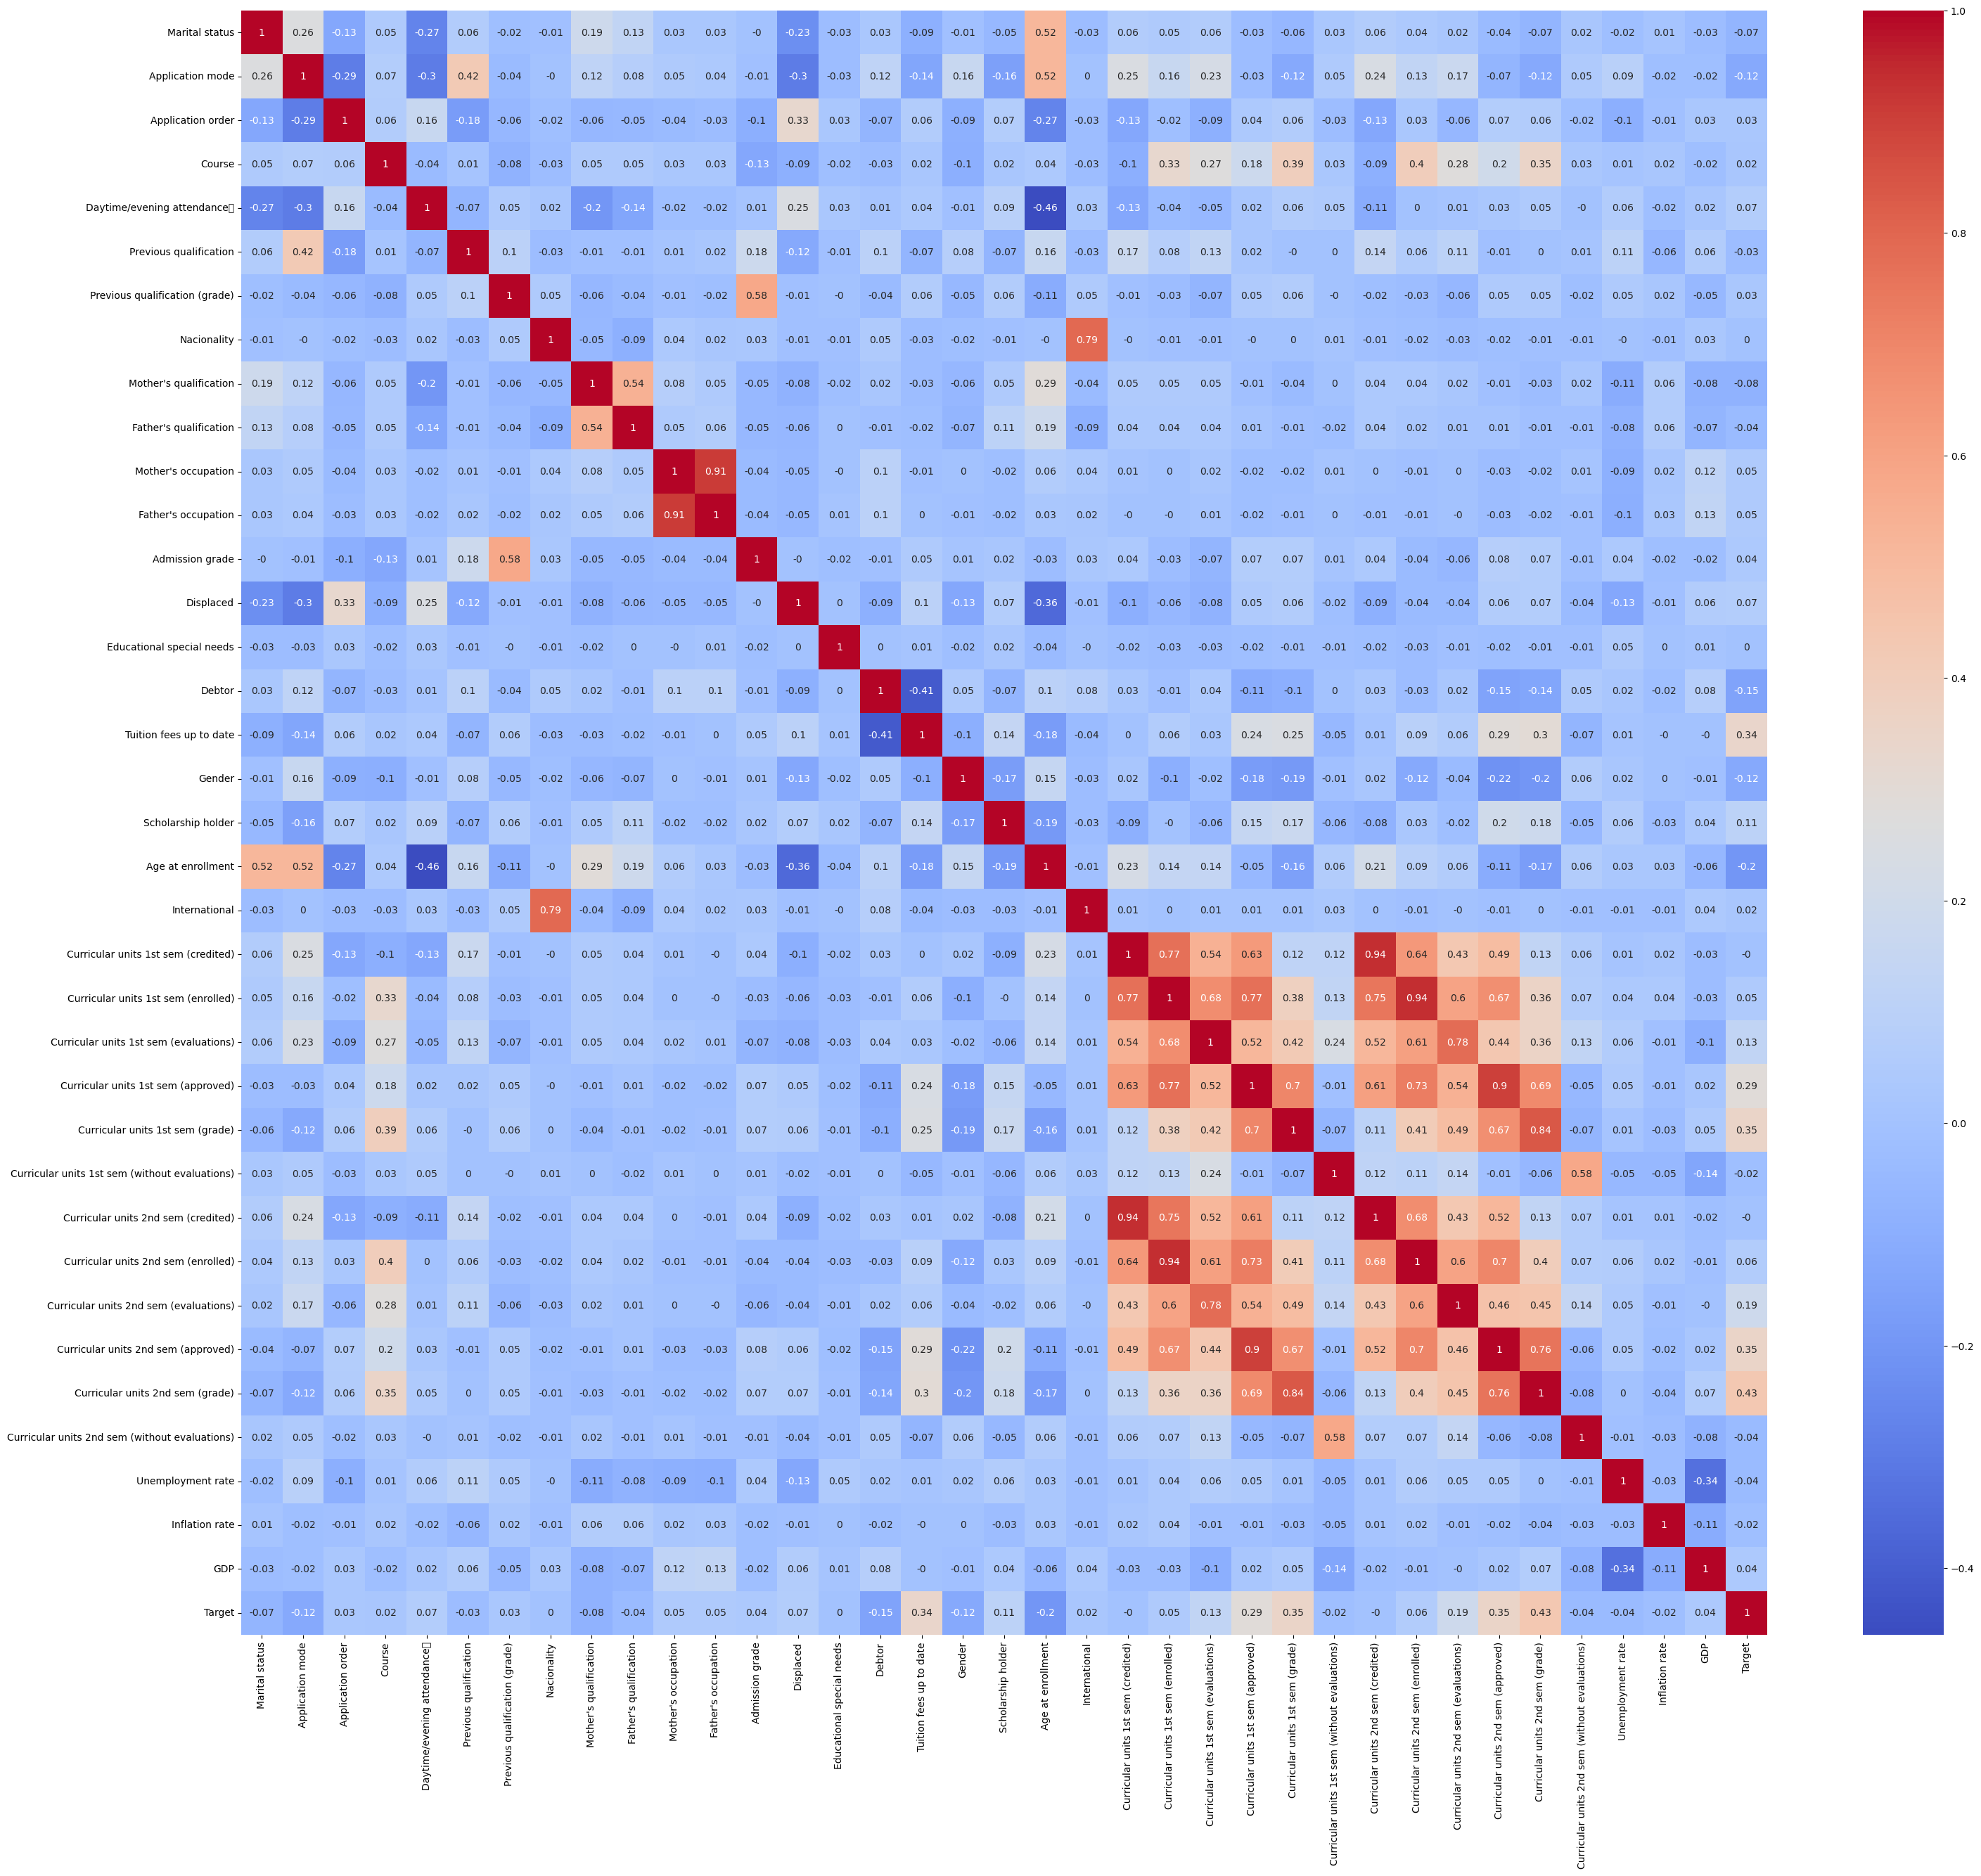

In [839]:
corr_matrix = df.corr() # correlation matrix

plt.figure(figsize=(35, 30))
sns.heatmap(corr_matrix.round(2), annot=True, cmap='coolwarm')
plt.show()

In [840]:
threshold = 0.85 # nguong loai bo
to_drop_columns = set()

for i in range(corr_matrix.shape[0] - 1):
    for j in range(i + 1, corr_matrix.shape[1] - 1):
        # Tim 2 features co do tuong quan vuot nguong threshold
        if abs(corr_matrix.iloc[i, j]) > threshold: 
            # Loai bo dac trung co do tuong quan thap hon so voi target
            if corr_matrix.iloc[i, corr_matrix.shape[1] - 1] > corr_matrix.iloc[j, corr_matrix.shape[0] - 1]: 
                to_drop_columns.add(corr_matrix.columns[j])
            else:
                to_drop_columns.add(corr_matrix.columns[j])
to_drop_columns

{'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 "Father's occupation"}

c:\Users\nguye\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\nguye\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


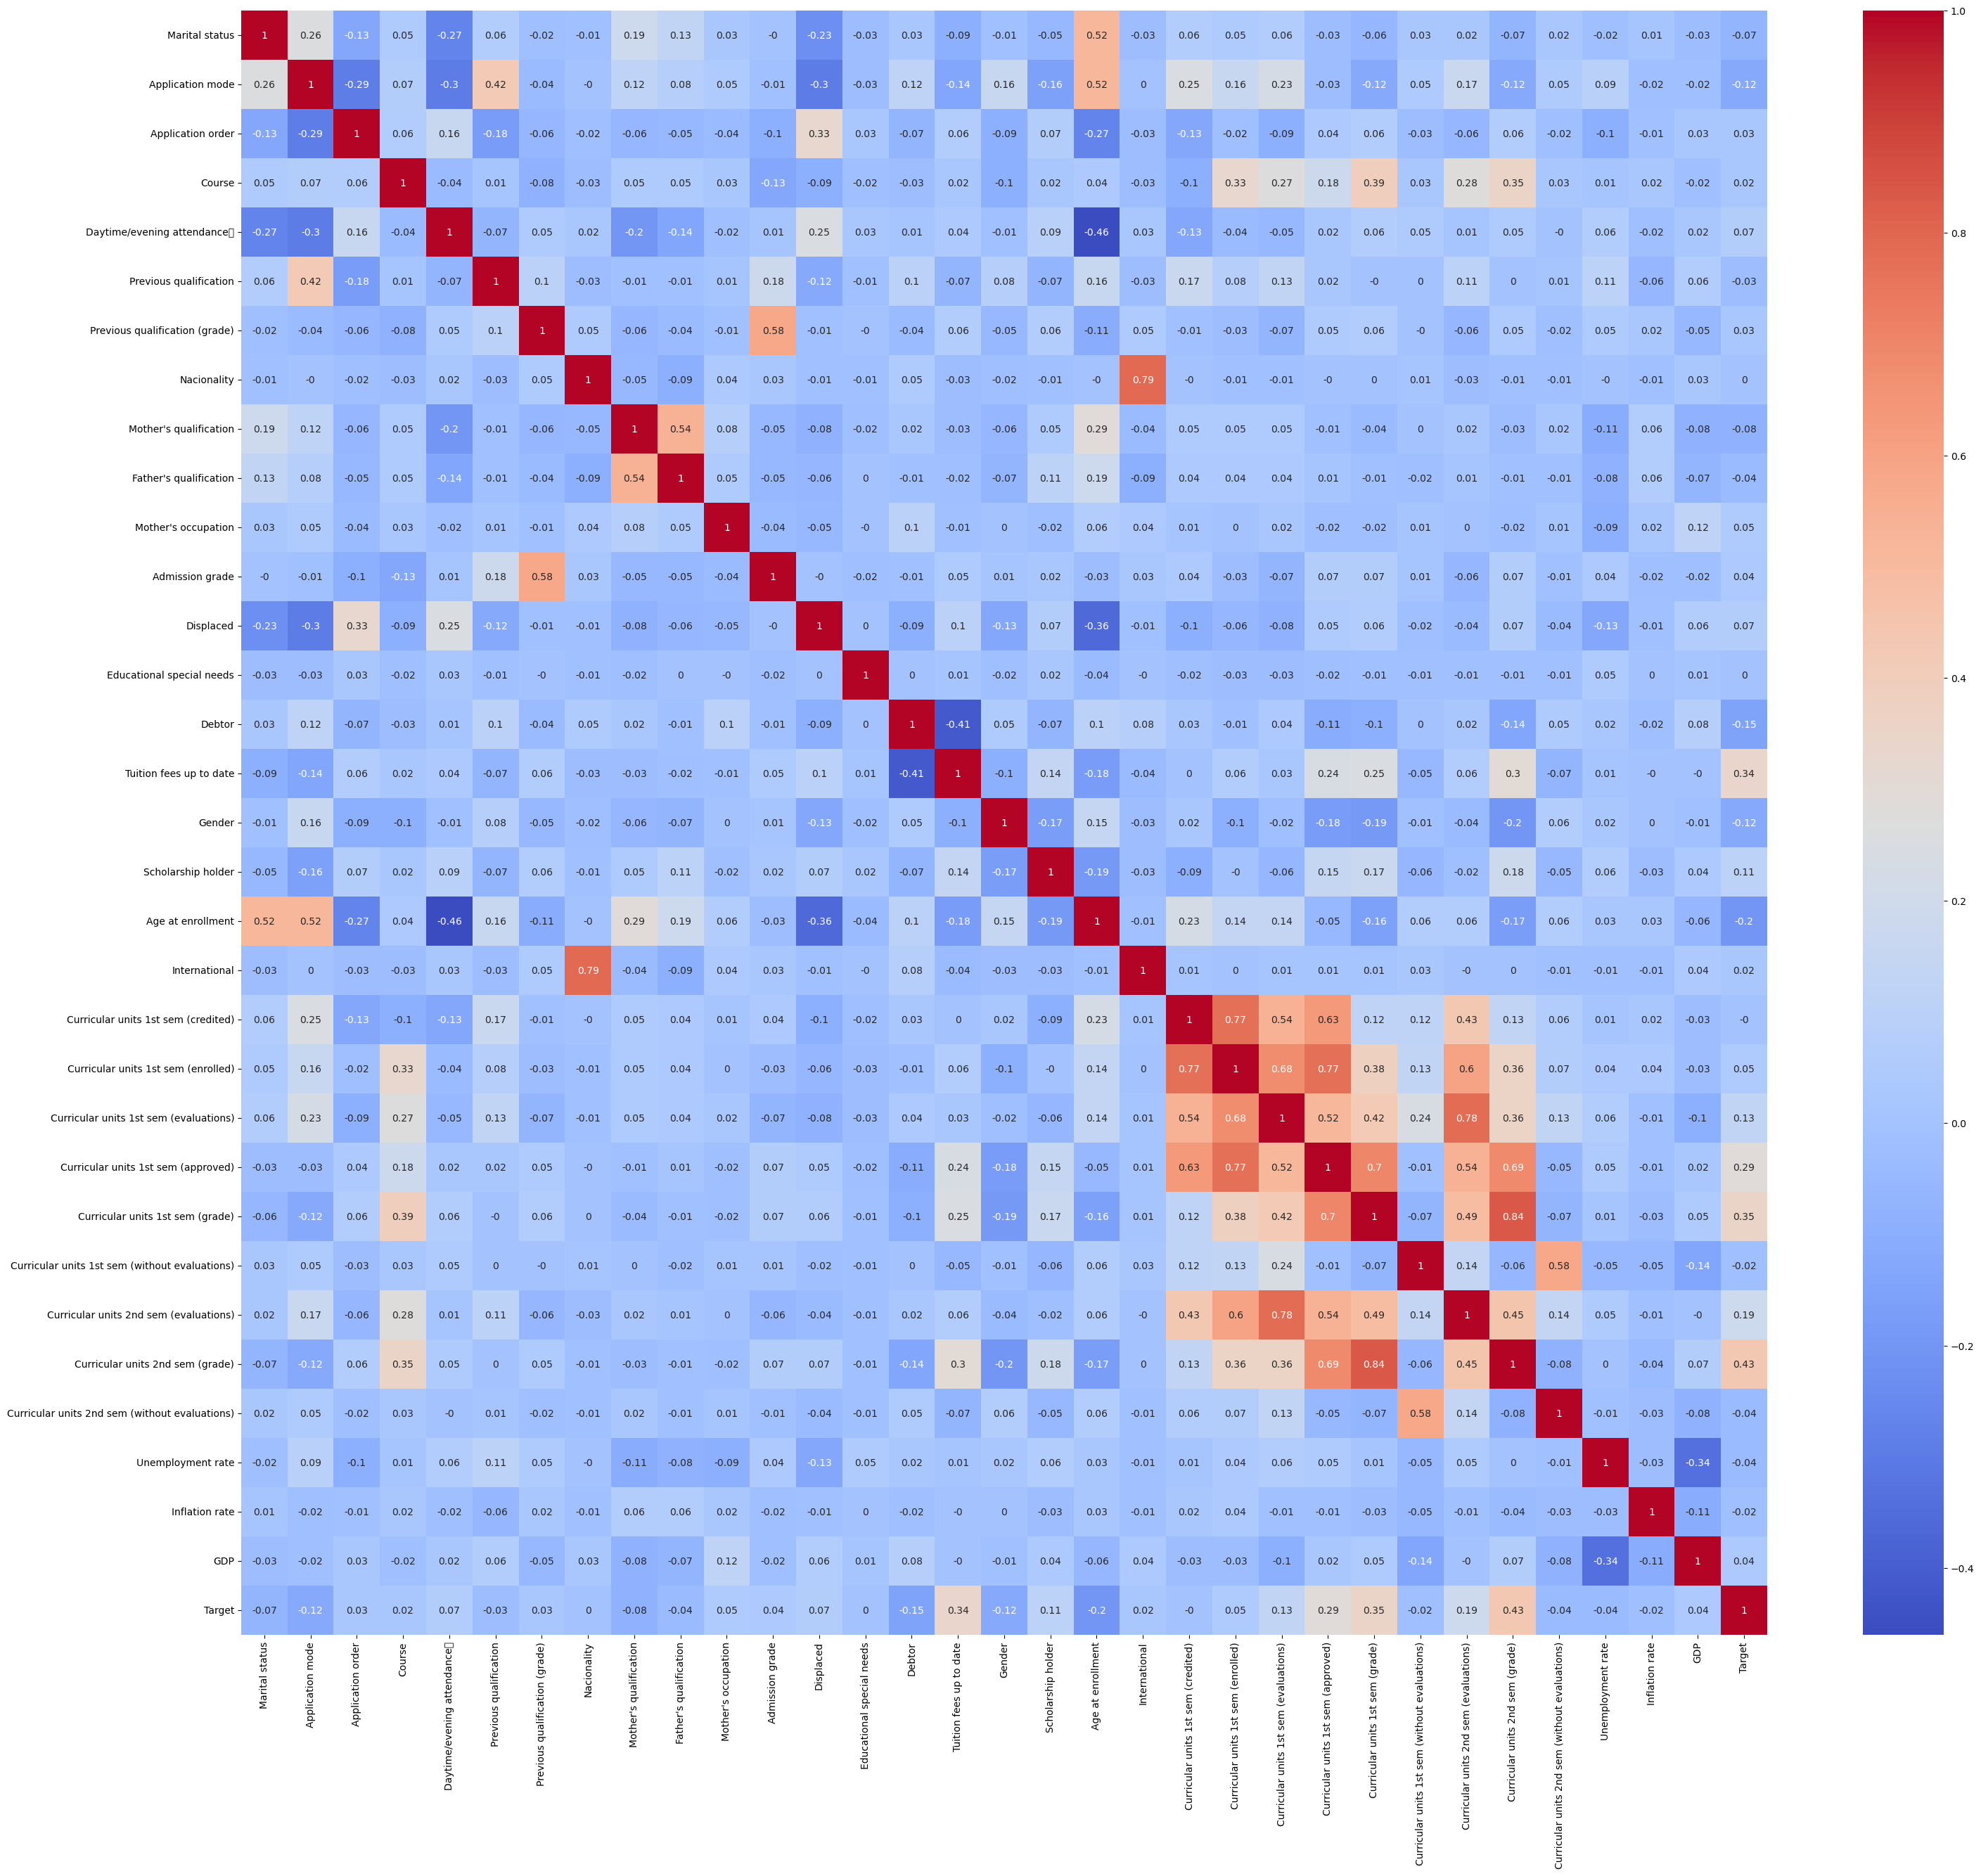

In [841]:
# Loai bo nhung dac trung co do tuong quan cao
df = df.drop(columns=list(to_drop_columns))

# Truc quan hoa lai ket qua correlation matrix
plt.figure(figsize=(35, 30))
sns.heatmap(data=df.corr().round(2), annot=True, cmap='coolwarm')
plt.show()

## Constructing input and output variables

In [842]:
X = df.drop(columns=['Target']).values
X = np.c_[np.ones((X.shape[0], 1)), X]
print(X.shape)

(4424, 33)


In [843]:
y = df['Target'].values
y_one_hot = np.zeros((y.shape[0], len(target_categories)))
for i in range(y.shape[0]):
    y_one_hot[i, y[i]] = 1
print(y_one_hot.shape)

(4424, 3)


In [844]:
# Chia tap du lieu
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y_one_hot[:split_index], y_one_hot[split_index:]

## Building Softmax Regression Model

In [845]:
class SoftmaxRegression:
    def __init__(self, epochs : int, lr : float) -> None:
        self.epochs = epochs
        self.lr = lr
        self.theta = None
        self.losses = []
        
    def softmax(self, z: np.ndarray) -> np.ndarray:
        return np.exp(z) / np.sum(np.exp(z), axis=0)
    
    def loss_fnc(self, y: np.ndarray, y_pred: np.ndarray) -> float:
        return - ((y * np.log(y_pred + 1e-6)).sum(axis=-1)).mean()
    
    def accuracy(self, y: np.ndarray, y_pred: np.ndarray) -> float:
        y_pred = np.argmax(y_pred, axis=1)
        y = np.argmax(y, axis=1)
        return (y == y_pred).mean()
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        z = X @ self.theta
        y_pred = self.softmax(z)
        return y_pred
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        n_samples = X.shape[0]
        dim = X.shape[1]
        n_classes = y.shape[-1]
        self.theta = np.zeros((dim, n_classes))
        
        with tqdm(range(self.epochs)) as pb:
            for epoch in pb:
                
                # forward
                pb.set_description(f'Epoch {epoch + 1}')
                y_pred = self.predict(X)
                
                # backward
                gradient = 1/n_samples * (X.T @ (y_pred - y))
                self.theta -= self.lr * gradient
                
                # update losses
                loss = self.loss_fnc(y, y_pred)
                pb.set_postfix({'Loss' : loss})
                self.losses.append(loss)

## Training and Evaluating

In [846]:
soft = SoftmaxRegression(500, 0.001)
soft.fit(X_train, y_train)

Epoch 500: 100%|██████████| 500/500 [00:01<00:00, 478.73it/s, Loss=7.97]


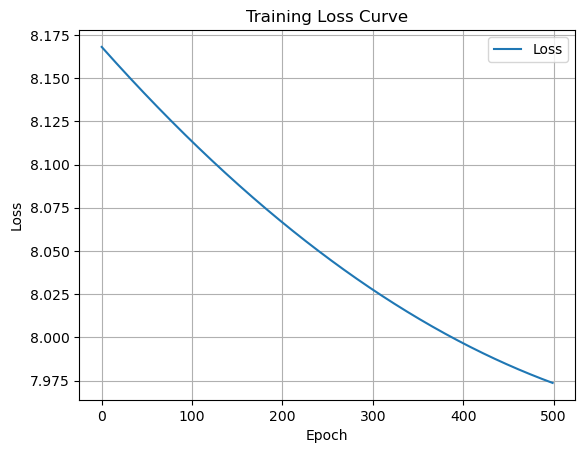

In [847]:
plt.plot(soft.losses, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.grid()
plt.show()

In [848]:
y_pred = soft.predict(X_test)
score = soft.accuracy(y_test, y_pred)
print(f'Accuracy: {score}')

Accuracy: 0.6915254237288135


# Assignment 3 (Sklearn)

In [849]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [850]:
df = pd.read_csv('data.csv', sep=';')
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [851]:
# 0 : Dropout, 1 : Graduate, 2: Enrolled
df['Target'] = df['Target'].apply(target_encode) 

In [852]:
X = df.drop(columns=['Target'])
y = df['Target']

In [853]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train, 20% test

In [854]:
# Standard Normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [855]:
# Gop nhan Dropout va Enrolled 
y_train_log = (y_train == 1).astype(int)
y_test_log = (y_test == 1).astype(int)

In [856]:
# Logistic Regression
log = LogisticRegression()
log.fit(X_train, y_train_log)

LogisticRegression()

In [857]:
y_pred = log.predict(X_test)
accuracy = accuracy_score(y_test_log, y_pred)
print("Logistic Regression Accuracy: ", accuracy)

Logistic Regression Accuracy:  0.8282485875706215


In [858]:
# Softmax Regression
soft = LogisticRegression(multi_class="multinomial", max_iter=1000)
soft.fit(X_train, y_train)

c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [859]:
y_pred = soft.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Softmax Regression Accuracy: ", accuracy)

Softmax Regression Accuracy:  0.752542372881356
